In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_data = scaler.fit_transform(df_market_data)


In [8]:
# Create a DataFrame with the scaled data

df_scaled = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data
df_scaled['crypto_name'] = df_scaled.index
df_scaled.reset_index(inplace=True)

# Set the coinid column as index

df_scaled.set_index('coin_id', inplace=True)


# Display sample data
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_name
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,binancecoin
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,chainlink
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,cardano
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,litecoin


---

### Find the Best Value for k Using the Original Data.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [10]:
# Create an empty list to store the inertia values

inertia_values = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=300)
    kmeans_model.fit(df_market_data)
    inertia_values.append(kmeans_model.inertia_)


In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'Number of Clusters (k)': k_values, 'Inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

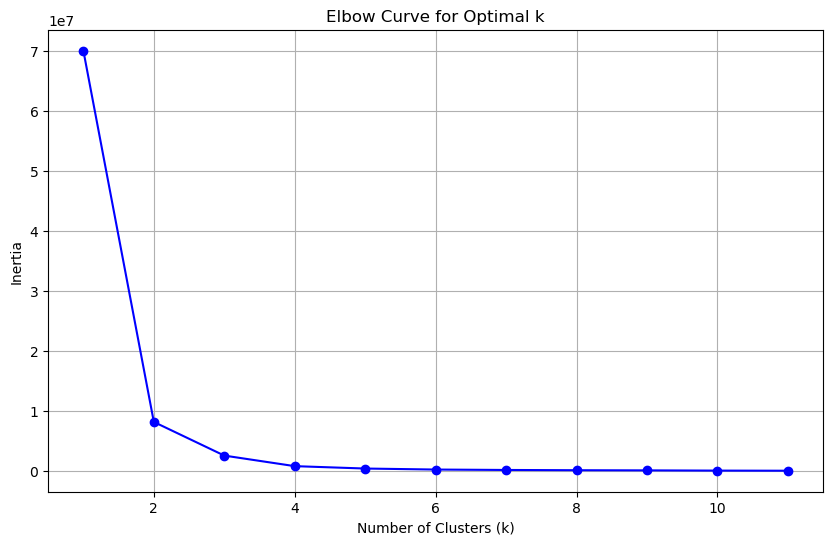

In [12]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['Number of Clusters (k)'], df_elbow['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [13]:
# Initialize the K-Means model using the best value for k
num_clusters = 3
# Select features for clustering
features_for_clustering = ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d']

df_cluster_data_original = df_market_data[features_for_clustering]

kmeans_original = KMeans(n_clusters=num_clusters, random_state=300)


In [14]:
# Fit the K-Means model using the scaled data
kmeans_original.fit(df_cluster_data_original)

KMeans(n_clusters=3, random_state=300)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters_original = kmeans_original.predict(df_cluster_data_original)

# Print the resulting array of cluster values.
print(clusters_original)

[0 0 2 2 0 0 0 0 0 2 1 2 2 0 2 2 1 2 0 2 1 0 1 2 2 2 2 1 0 1 2 2 1 2 1 1 0
 1 2 2 1]


In [16]:
# Create a copy of the DataFrame
df_original_clustered = df_market_data.copy()

In [17]:
# Add a new column to the DataFrame with the predicted clusters
df_original_clustered['cluster'] = clusters_original

# Display sample data
df_original_clustered.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,2
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,2
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,0
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,0


In [18]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_original_clustered.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',
    colormap='viridis',
    size=50,
    hover_cols=['crypto_name'],
    title='K-Means Clustering of Cryptocurrencies',
    xlabel='Price Change Percentage (24 hours)',
    ylabel='Price Change Percentage (7 days)'
)


scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)


In [20]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled.drop(columns=['crypto_name']))
# View the first five rows of the DataFrame. 
pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3']).head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

print("\nExplained Variance for Each Principal Component:")
for i, variance in enumerate(explained_variance, 1):
    print(f"PC{i}: {variance:.4f}")
    
total_explained_variance = explained_variance.sum()
print(f"\nTotal Explained Variance of the Three Principal Components: {total_explained_variance:.4f}")



Explained Variance for Each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760

Total Explained Variance of the Three Principal Components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950

In [22]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_pca['crypto_name'] = df_scaled['crypto_name']


# Display sample data
df_pca.head()

,PC1,PC2,PC3,crypto_name
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,bitcoin
ethereum,-0.458261,0.458466,0.952877,ethereum
tether,-0.433070,-0.168126,-0.641752,tether
ripple,-0.471835,-0.222660,-0.479053,ripple
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash


---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [24]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=300)
    kmeans_pca.fit(df_pca.drop(columns=['crypto_name']))
    inertia_values.append(kmeans_pca.inertia_)

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

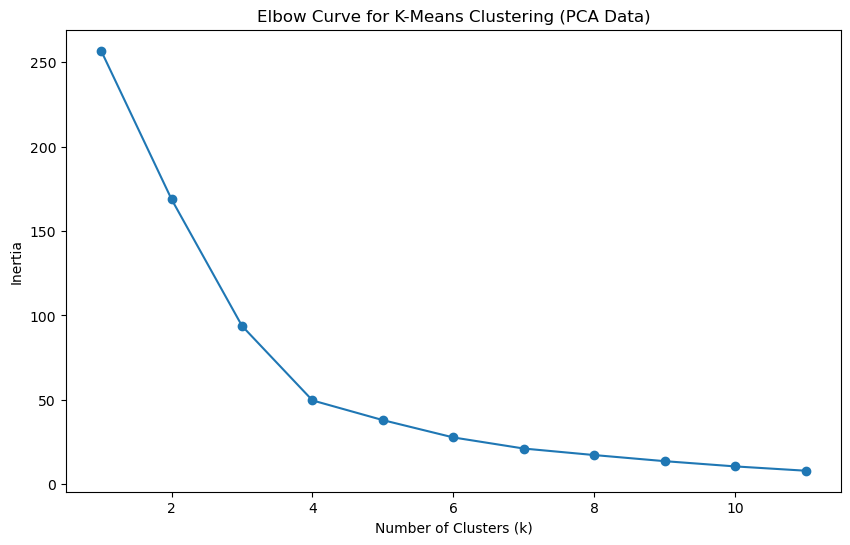

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o')
plt.title('Elbow Curve for K-Means Clustering (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [27]:
# Initialize the K-Means model using the best value for k
k_pca = 4
kmeans_pca = KMeans(n_clusters=k_pca, random_state=300)

In [28]:
# Fit the K-Means model using the PCA data
clusters_pca = kmeans_pca.fit_predict(df_pca.drop(columns=['crypto_name']))


In [29]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.
clusters_pca

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1])

In [30]:
# Create a copy of the DataFrame with the PCA data

df_pca_clustered = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_clustered['cluster'] = clusters_pca

# Display sample data
df_pca_clustered.head(10)

,PC1,PC2,PC3,crypto_name,cluster
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,bitcoin,0
ethereum,-0.458261,0.458466,0.952877,ethereum,0
tether,-0.433070,-0.168126,-0.641752,tether,1
ripple,-0.471835,-0.222660,-0.479053,ripple,1
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash,0
binancecoin,-0.516534,1.388377,0.804071,binancecoin,0
chainlink,-0.450711,0.517699,2.846143,chainlink,0
cardano,-0.345600,0.729439,1.478013,cardano,0
litecoin,-0.649468,0.432165,0.600303,litecoin,0


In [31]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = df_pca_clustered.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',
    colormap='viridis',
    size=50,
    hover_cols=['crypto_name'],
    title='K-Means Clustering of Cryptocurrencies (PCA Data)',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)'
)
scatter_plot_pca

:Scatter   [PC1]   (PC2,cluster,crypto_name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

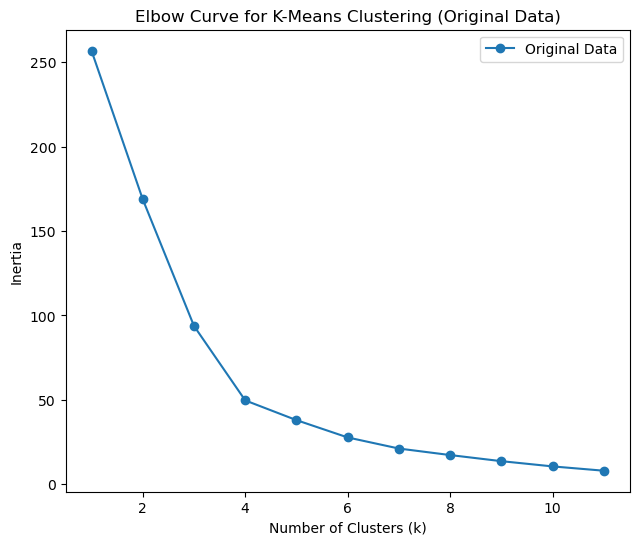

In [32]:
plt.figure(figsize=(16, 6))

# Plot the Elbow curve for the original data
plt.subplot(1, 2, 1)
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', label='Original Data')
plt.title('Elbow Curve for K-Means Clustering (Original Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()

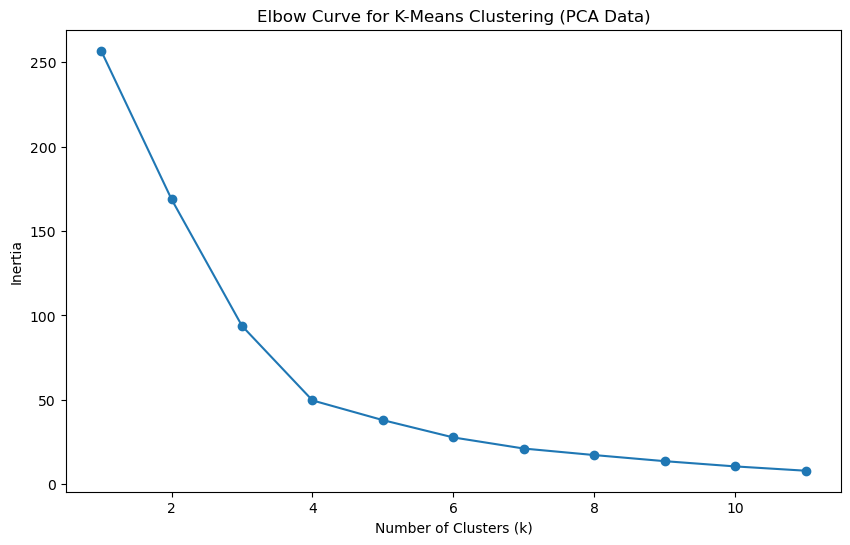

In [33]:
# Plot the Elbow curve for the PCA data
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o')
plt.title('Elbow Curve for K-Means Clustering (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [34]:
# Composite plot to contrast the clusters
scatter_plot_original = df_original_clustered.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',
    colormap='viridis',
    size=50,
    hover_cols=['crypto_name'],
    title='K-Means Clustering of Cryptocurrencies (Original Data)',
    xlabel='Price Change Percentage (24 hours)',
    ylabel='Price Change Percentage (7 days)'
)

scatter_plot_pca_comparison = df_pca_clustered.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',
    colormap='viridis',
    size=50,
    hover_cols=['crypto_name'],
    title='K-Means Clustering of Cryptocurrencies (PCA Data)',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)'
)

In [72]:
scatter_plot_original + scatter_plot_pca_comparison

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster)
   .Scatter.II :Scatter   [PC1]   (PC2,cluster,crypto_name)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  The impact of using fewer features (principal components) with PCA is that the clustering is performed in a lower-dimensional space.
  PCA captures the most significant variations in the data, potentially leading to clusters that represent the essential patterns with reduced noise.
  Clusters in the PCA method might appear different or more compact compared to the clusters formed using the original features.